# Big Data Programming - Assignment 4

### Use USGS API to get all earthquakes with Magnitude 4 or higher from 2​ 016-01-01 to 2019-10-01. ​Your notebook code should show how you got the dataset. I will not accept any solutions that magically acquired the data.

### Importing all the necessary libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

### Using the USGS API to get the data

Since the API limits the maximum number of results to 20,000. We need to iteratively pull all the necessary data. I am using the 'offset' and 'limit' methods offered by API to do this successfully. 

### 0) Show all your code to acquire the dataset in your notebook. If you fail to show how you acquired the dataset, you will earn a zero on the assignment.
Pulling the data from 2016-01-01 to 2019-10-01

Timing the whole process using 'datetime' class.

In [2]:
from datetime import datetime 
from sys import exit

start_time = datetime.now() 

OutputFile = "usgsApiData.csv"
startDate = "2016-01-01"
endDate = "2019-10-02"

usgsCount = requests.get("https://earthquake.usgs.gov/fdsnws/event/1/count?minmagnitude=4.0&\
            starttime="+startDate+"&endtime="+endDate)
status = str(usgsCount.status_code)
inter_time1 = datetime.now() 
if status[0] == "2" :
    print("Count request Successful with status code:",status)
    print("Time elapsed (hh:mm:ss.ms) {}".format(inter_time1-start_time))
else:
    print("An error with status code",status,"has occured. Exiting!")
    exit()
print("No of Rows available through API: ",usgsCount.text)

print()
ApiData = []
offset = 1
turns = 1
sp = 0
while True:
    usgsPull = requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&limit=20000&\
                minmagnitude=4.0&offset="+str(offset)+"&starttime="+startDate+"&endtime="+endDate)
    
    status = str(usgsPull.status_code)
    temp = usgsPull.text.splitlines()
#    print(turns)
    if status[0] == "2" :
        if turns > 1 : sp = 1
        for i in range(sp,len(temp)):
            ApiData.append(temp[i])
        if len(temp) < 20001:
            break
    else :
        print("An error with status code",status,"has occured at turn:",str(turns),"after successfully extracting ",\
              str(offset-20000),"lines. Exiting!")
        exit()
         
    offset += 20000
    turns += 1


print("Query request Successful with status code:",status)

inter_time2 = datetime.now()
print("Time elapsed (hh:mm:ss.ms) {}".format(inter_time2-inter_time1))
print("No of Rows extracted through API:", len(ApiData)-1)

print()
usgsFile = open(OutputFile,"w")
print("Writing CSV data to file '"+OutputFile+"' ...")
usgsFile.write("\n".join(ApiData))
usgsFile.close()
print("Write to file successful. Closing the file.")

time_elapsed = datetime.now() - start_time 
print('Total Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))


Count request Successful with status code: 200
Time elapsed (hh:mm:ss.ms) 0:00:09.650839
No of Rows available through API:  53023

Query request Successful with status code: 200
Time elapsed (hh:mm:ss.ms) 0:01:03.900158
No of Rows extracted through API: 53023

Writing CSV data to file 'usgsApiData.csv' ...
Write to file successful. Closing the file.
Total Time elapsed (hh:mm:ss.ms) 0:01:13.583890


### Reading the extracted data into a Pandas Dataframe

In [4]:
usgsFull = pd.read_csv('usgsApiData.csv')
pd.set_option('display.max_columns', None)
print('Shape of the complete data extracted: ',usgsFull.shape)
print('Column list')
usgsFull.dtypes

Shape of the complete data extracted:  (53023, 22)
Column list


time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

### Filtering for Earthquake only data

In [20]:
print(usgsFull['type'].value_counts())
usgsData = usgsFull[usgsFull['type']=='earthquake'].copy()
print()
print('Filtering for Earthquake data:')
print(usgsData.shape)
# usgsData.head()

earthquake           52953
volcanic eruption       62
mining explosion         3
nuclear explosion        3
collapse                 1
landslide                1
Name: type, dtype: int64

Filtering for Earthquake data:
(52953, 22)


### 1) Use describe to get the basic statistics of all the columns (5 points)

In [6]:
usgsData.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,52953.000000,52953.000000,52953.000000,52953.000000,337.000000,52108.000000,52063.000000,52953.000000,52511.000000,52953.000000,51238.000000,51379.000000
mean,1.883978,34.096456,94.242603,4.526333,47.314540,110.730175,3.713607,0.827334,8.754803,5.449737,0.121075,42.227155
std,28.964193,124.268041,147.873811,0.397902,35.342401,51.023282,4.738057,0.262197,3.650901,4.190625,0.065078,61.170727
min,-79.983700,-179.998600,-0.930000,4.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.518800,-74.363300,10.000000,4.300000,23.000000,73.000000,1.173000,0.650000,6.300000,1.900000,0.073000,12.000000
50%,-3.359300,94.023900,33.930000,4.500000,37.000000,106.000000,2.382000,0.810000,8.200000,4.800000,0.112000,21.000000
75%,24.317700,141.909900,106.190000,4.700000,64.000000,142.250000,4.399500,0.990000,10.800000,7.900000,0.153000,45.000000
max,86.996400,179.999300,690.950000,8.200000,289.000000,346.000000,62.626000,2.530000,51.700000,69.300000,1.000000,854.000000


### 2) Get the top 10 earthquakes by magnitude (5 points)

In [7]:
usgsData.sort_values(by = 'mag', ascending = False).head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
29047,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,us,us2000ahv0,2019-09-12T03:25:23.535Z,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us
16193,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,NaN,13.0,3.630,0.79,us,us1000gcii,2019-08-19T06:18:42.402Z,"286km NNE of Ndoi Island, Fiji",earthquake,9.6,1.9,0.045,47.0,reviewed,us,us
4561,2019-05-26T07:41:15.073Z,-5.8119,-75.2697,122.57,8.0,mww,NaN,17.0,3.180,0.84,us,us60003sc0,2019-10-20T00:29:23.662Z,"78km SE of Lagunas, Peru",earthquake,7.0,4.0,0.036,75.0,reviewed,us,us
36833,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,NaN,9.0,3.625,1.22,us,us10007uph,2018-10-17T21:53:19.164Z,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us
38415,2016-12-17T10:51:10.500Z,-4.5049,153.5216,94.54,7.9,mww,NaN,13.0,1.389,0.97,us,us200081v8,2018-10-17T21:50:55.380Z,"54km E of Taron, Papua New Guinea",earthquake,7.3,3.8,NaN,NaN,reviewed,us,us
15105,2018-09-06T15:49:18.710Z,-18.4743,179.3502,670.81,7.9,mww,NaN,12.0,1.431,1.07,us,us2000h9e2,2019-04-23T04:45:27.592Z,"102km ESE of Suva, Fiji",earthquake,9.5,2.8,0.025,157.0,reviewed,us,us
23760,2018-01-23T09:31:40.890Z,56.0039,-149.1658,14.06,7.9,mww,NaN,30.0,2.585,0.77,us,us2000cmy3,2019-07-01T15:34:15.502Z,"280km SE of Kodiak, Alaska",earthquake,6.0,2.8,0.034,81.0,reviewed,us,us
48910,2016-04-16T23:58:36.980Z,0.3819,-79.9218,20.59,7.8,mww,NaN,15.0,1.440,0.94,us,us20005j32,2019-10-15T14:06:57.770Z,"27km SSE of Muisne, Ecuador",earthquake,5.7,3.2,NaN,NaN,reviewed,us,us
50719,2016-03-02T12:49:48.110Z,-4.9521,94.3299,24.00,7.8,mww,NaN,20.0,7.009,1.14,us,us10004u1y,2018-12-04T22:30:13.007Z,"Southwest of Sumatra, Indonesia",earthquake,7.5,1.8,NaN,NaN,reviewed,us,us
38961,2016-12-08T17:38:46.280Z,-10.6812,161.3273,40.00,7.8,mww,NaN,13.0,1.836,0.88,us,us20007z80,2018-10-17T21:50:46.404Z,"69km WSW of Kirakira, Solomon Islands",earthquake,8.3,1.8,NaN,NaN,reviewed,us,us


### 3) Handle all Null/empty data by filling it with zeros (10 points)

In [8]:
print("Checking if Null values exist:")
print(usgsData.isnull().any())
print()
usgsData.fillna(0,inplace=True)
print("Checking if Null values exist after handling:")
print(usgsData.isnull().any())

Checking if Null values exist:
time               False
latitude           False
longitude          False
depth              False
mag                False
magType            False
nst                 True
gap                 True
dmin                True
rms                False
net                False
id                 False
updated            False
place              False
type               False
horizontalError     True
depthError         False
magError            True
magNst              True
status             False
locationSource     False
magSource          False
dtype: bool

Checking if Null values exist after handling:
time               False
latitude           False
longitude          False
depth              False
mag                False
magType            False
nst                False
gap                False
dmin               False
rms                False
net                False
id                 False
updated            False
place              False
type      

### 4) Find the top 10 places where the strongest earthquakes occurred (15 points)​ 
(Note: Place needs to be parsed nicely to remove the KM location from them. For example: 75km WSW of Illapel, Chile should look like Illapel, Chile).

In [9]:
print("Top 10 places where the Strongest Earthquakes occured are:")
pprint(usgsData.sort_values(by = 'mag', ascending = False)['place'].\
        apply(lambda x: x[x.rindex('of')+3:] if ('of' in x) else x).\
        drop_duplicates().head(10).to_list())


Top 10 places where the Strongest Earthquakes occured are:
['Tres Picos, Mexico',
 'Ndoi Island, Fiji',
 'Lagunas, Peru',
 'Panguna, Papua New Guinea',
 'Taron, Papua New Guinea',
 'Suva, Fiji',
 'Kodiak, Alaska',
 'Muisne, Ecuador',
 'Sumatra, Indonesia',
 'Kirakira, Solomon Islands']


### 5) Find the top 10 places where the weakest earthquakes occurred (15 points)
​ ​(Note: Place needs to be parsed nicely to remove the KM location from them. For example: 75km WSW of Illapel, Chile should look like Illapel, Chile).


In [10]:
print("Top 10 places where the weakest Earthquakes occured are:")
pprint(usgsData.sort_values(by = 'mag', ascending = True)['place'].\
        apply(lambda x: x[x.rindex('of')+3:] if ('of' in x) else x).\
        drop_duplicates().head(10).to_list())


Top 10 places where the weakest Earthquakes occured are:
['Shizunai, Japan',
 'Mendi, Papua New Guinea',
 'Banda Aceh, Indonesia',
 'Amatignak Island, Alaska',
 'Tinabogan, Indonesia',
 'Abepura, Indonesia',
 'San Pedro de Atacama, Chile',
 'Agrihan, Northern Mariana Islands',
 'Visokoi Island, South Georgia and the South Sandwich Islands',
 'San Antonio de los Cobres, Argentina']


### 6)​ On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges:​ Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. (20 points) Please add labels and colors to the plot.

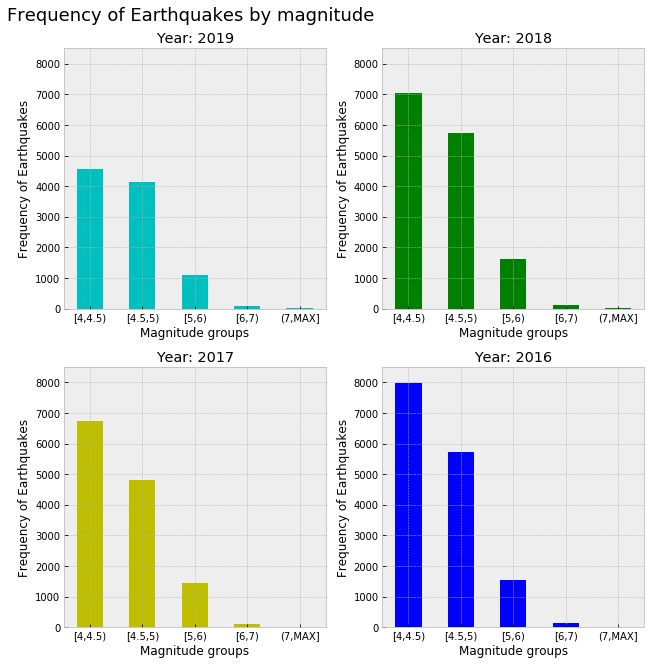

In [11]:
bins = pd.IntervalIndex.from_tuples([(4, 4.5), (4.5, 5), (5, 6), (6,7), (7.1,20)],'left')

temp = pd.cut(usgsData['mag'].to_list(),bins=bins)
# print(temp.to_list())
temp.categories = ['[4,4.5)', '[4.5,5)', '[5,6)', '[6,7)', '(7,MAX]']
# print(temp)
usgsData['mag_bins'] = temp
# print(usgsData['mag_bins'])

usgsData['time_converted'] = pd.to_datetime(usgsData['time'],format='%Y-%m-%dT%H:%M:%S.%fZ')
usgsData['year'] = usgsData['time_converted'].dt.year

distinctYears = usgsData['year'].unique()
# print(distinctYears)


with plt.style.context('bmh'):
    fig6, axis = plt.subplots(2,2,figsize=(9,9))
    fig6.text(x=0, y=1,s='Frequency of Earthquakes by magnitude',fontsize=18)
#     fig6.style.use('seaborn-deep')
    colors = list('cgybmkr')

    axis = axis.ravel()
    for i,ax in enumerate(axis):
        usgsData[usgsData['year']==distinctYears[i]]['mag_bins'].value_counts().\
            plot(kind='bar',color=colors[i],ax=ax)
        ax.set(xlabel='Magnitude groups', ylabel='Frequency of Earthquakes',title="Year: "+repr(distinctYears[i]),\
                        ylim=[0, 8500])
        ax.tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()

### 7) ​Find the 10 countries with the highest number of earthquakes (30 points)​ (Note: Yes, this is only countries, not full place)

In [12]:
usgsData['country'] = usgsData['place'].apply(lambda x: x[x.rindex(',')+2:] if (',' in x) else (x[x.rindex('of')+3:] if ('of' in x) else x))
usgsData['country'].value_counts().head(10)

Indonesia           6578
Japan               3427
Papua New Guinea    3091
Fiji                2530
New Zealand         2463
Chile               2301
Philippines         2087
Alaska              1867
Russia              1757
Tonga               1644
Name: country, dtype: int64

### 8) ​Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) P​ lease add labels and colors to the plot.

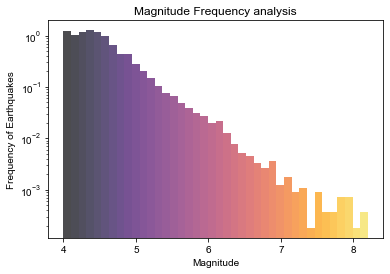

In [13]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('inferno').colors

n, bins, patches = ax.hist(usgsData['mag'],bins=40,density=True,alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Magnitude', ylabel='Frequency of Earthquakes',title="Magnitude Frequency analysis",yscale='log')
plt.show()

#### In the above graph we can observe a right skewed distribution in the data. There is a negative linear relationship between the magnitude and the frequency of earthquakes, meaning as the magnitude increases the frequency decreases.

### 9) ​Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) ​Please add labels and colors to the plot.

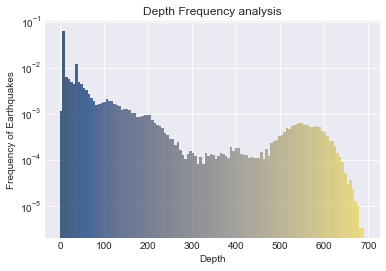

In [14]:
fig8,ax = plt.subplots(1)
cmap_list = plt.get_cmap('cividis').colors

n, bins, patches = ax.hist(usgsData['depth'],bins=120,density=True,alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=2

ax.set(xlabel='Depth', ylabel='Frequency of Earthquakes',title="Depth Frequency analysis",yscale='log')

plt.show()

#### We can observe a Bimodal Distribution in this case. The frequency takes a slight dip from the range of 300km to 500km and again raises from there to fall at 700km. 

### 10) ​Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. (20 points) ​Please add labels and colors to the plot.

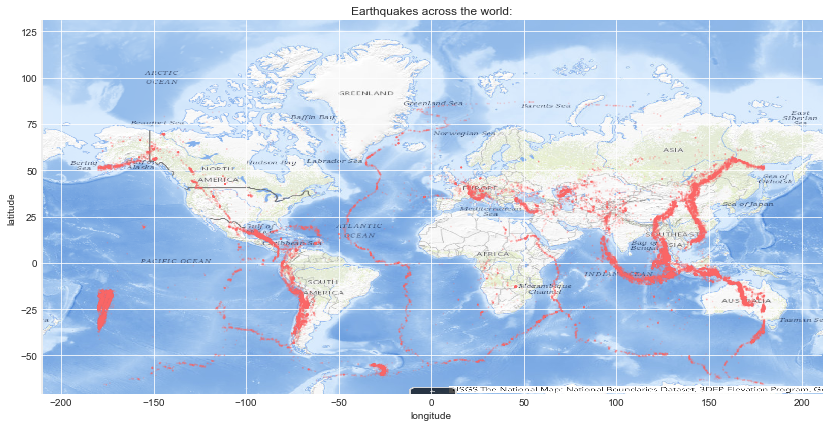

In [15]:
import matplotlib.image as mpimg
# print(usgsData.describe())
world_img=mpimg.imread('worldmap6.png')

usgsData.plot(kind="scatter", x="longitude", y="latitude",s=usgsData["mag"]/10, alpha=0.2,color="#FF6666",figsize=(14,8))
# plt.legend()
# Define the projection, scale, the corners of the map, and the resolution.
# m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
plt.title("Earthquakes across the world:")
plt.imshow(world_img,extent=[-210.998600,210.999300,-70.983700,130.996400])
# plt.imshow(world_img,extent=[-170.998600,130.999300,-105.983700,95.996400])
plt.show()

## Graduate student questions:

### 11) Using the US package (https://pypi.org/project/us/), clean the dataset you used previously to only have data from the USA .​ You need to create a function that accommodates this. (20 points)

In [16]:
import us
allStates = []
for var in us.states.STATES_AND_TERRITORIES:
    allStates.append(var.name)
    
# print(allStates)

def stateCheck(country):
    ret_arr = []
    for x in country:
        flag = False
        if str(x) in ('South Georgia and the South Sandwich Islands','South Georgia Island region',\
                      'British Virgin Islands','the Philippine Islands') : 
            ret_arr.append(False)
            continue
        if str(x) in ('CA') :
            ret_arr.append(True)
            continue
        for state in allStates:
            if state.upper().strip() in str(x).upper().strip(): 
                flag = True
                
        ret_arr.append(flag)
    return(ret_arr);

usgsUS = usgsData.loc[stateCheck(usgsData['country'])].copy()
usgsUS['state'] = usgsUS['country'].where(usgsUS['country']!='CA','California')
print(usgsUS['state'].value_counts())
print(usgsUS.shape)

Alaska                      1867
Northern Mariana Islands    1078
Guam                         384
California                   196
Oregon                        89
Hawaii                        60
Oklahoma                      36
Idaho                         35
Puerto Rico                   32
Nevada                        16
Montana                       13
Georgia                        9
U.S. Virgin Islands            8
Utah                           4
Colorado                       4
Kansas                         4
Wyoming                        3
Washington                     3
American Samoa                 3
Texas                          2
Nebraska                       1
Guam region                    1
Delaware                       1
New Mexico                     1
Maryland                       1
Ohio                           1
Louisiana                      1
Tennessee                      1
Name: state, dtype: int64
(3854, 27)


### 12) Using the cleaned US-only version of your dataset answer the following questions (30 points total):

#### a) Find the top 10 US states where the strongest earthquakes occurred (10 points)

In [17]:
print("Top 10 U.S. States where the Strongest Earthquakes occured are:")
Top10US = usgsUS.sort_values(by = 'mag', ascending = False)['state'].drop_duplicates().head(10).to_list()
pprint(Top10US)

Top 10 U.S. States where the Strongest Earthquakes occured are:
['Alaska',
 'Northern Mariana Islands',
 'Hawaii',
 'California',
 'Oregon',
 'Puerto Rico',
 'Montana',
 'Guam',
 'Oklahoma',
 'Nevada']


#### b) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. (10 points) Please add labels and colors to the plot.

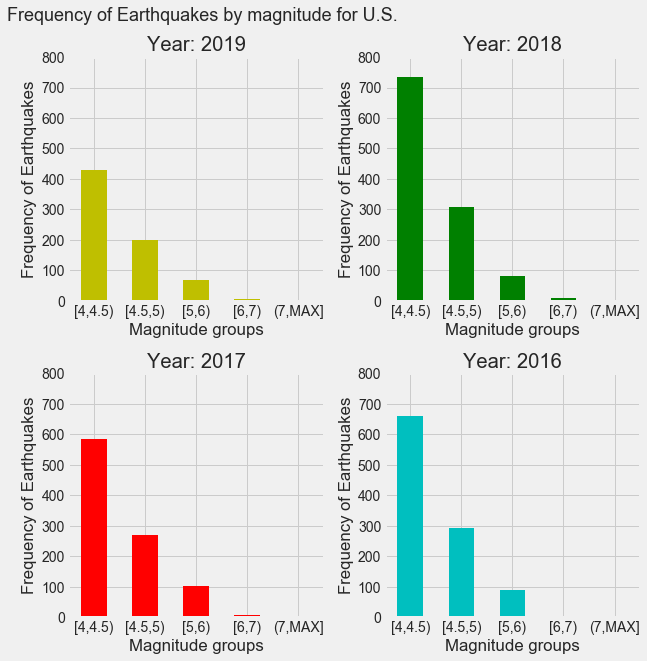

In [18]:
distinctYears = usgsData['year'].unique()
# print(distinctYears)

%matplotlib inline
with plt.style.context('fivethirtyeight'):
    fig6, axis = plt.subplots(2,2,figsize=(9,9))
    fig6.text(x=0, y=1,s='Frequency of Earthquakes by magnitude for U.S.',fontsize=18)
#     fig6.style.use('seaborn-deep')
    colors = list('ygrcbck')

    axis = axis.ravel()
    for i,ax in enumerate(axis):
        usgsUS[usgsUS['year']==distinctYears[i]]['mag_bins'].value_counts().\
            plot(kind='bar',color=colors[i],ax=ax)
        ax.set(xlabel='Magnitude groups', ylabel='Frequency of Earthquakes',title="Year: "+repr(distinctYears[i]),\
                        ylim=[0, 800])
        ax.tick_params(axis='x', labelrotation=0)

    plt.tight_layout()
    plt.show()

#### c) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. Overlay a US map on top of this plot to match the locations. (20 points) Please add labels and colors to the plot.

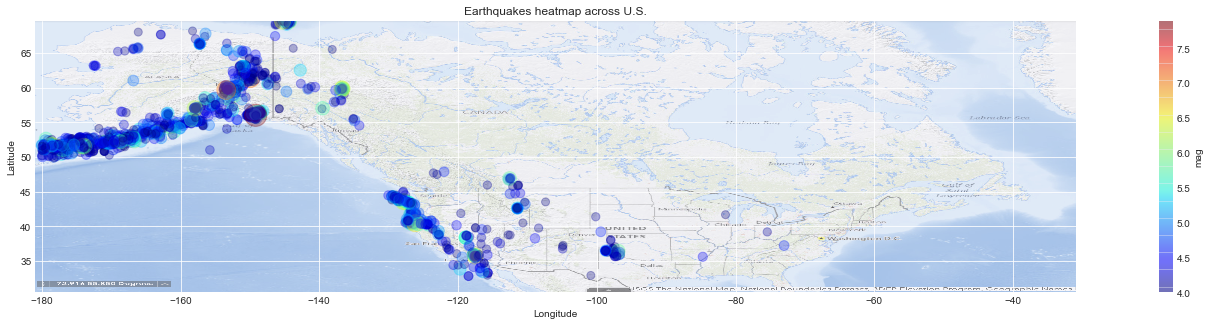

In [19]:
%matplotlib inline
import matplotlib.image as mpimg
world_img=mpimg.imread('usmap7.png')

fig, ax = plt.subplots(1)
usgsUS.plot(kind="scatter", x="longitude", y="latitude",s=usgsUS["mag"]**3,c="mag",\
            cmap=plt.get_cmap("jet"), colorbar='False', alpha=0.3,figsize=(30,5),ax=ax)
ax.set(xlabel='Longitude', ylabel='Latitude',title="Earthquakes heatmap across U.S.")
plt.imshow(world_img,extent=[-180.996300,-30.980300,30.493300,69.666200],alpha=0.6)
# plt.legend()
plt.show()
